# Helper Notebook
Contains various commands used to set up training Teeny Stable Diffusion.

## Finetuning: mitsua-diffusion-cc0 (SD2.1)
This model is based on the Mitsua Diffusion model, which is available on . The model is trained on data licensed under CC0.

According to [Huggingface](https://huggingface.co/docs/huggingface_hub/how-to-downstream) the following is how to pull the model.

In [ ]:
from huggingface_hub import snapshot_download

snapshot_download(repo_id="Mitsua/mitsua-diffusion-cc0", ignore_patterns=["*.webp", "*.csv", "mitsua-diffusion-cc0-v1-0.ckpt"])

In [ ]:
#Use PIL to open the image and display it, convert it to a tensor and normalize it
from PIL import Image
import torch
from torchvision import transforms

img = Image.open("test.jpg")
# Convert img to a PyTorch tensor

convert_tensor = transforms.Compose(
        [
            transforms.Resize(512, interpolation=transforms.InterpolationMode.BILINEAR),
            transforms.CenterCrop(512),
            transforms.Lambda(lambda x: x),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5]),
        ]
    )
t = convert_tensor(img)
print(t.shape)

In [3]:
import PIL

from test import test
from diffusers.pipelines import StableDiffusionPipeline

t = test ("Pussy")

# Import Matplotlib and show image
import matplotlib.pyplot as plt
for img in t:
    # Show a PIL image with Matplotlib
    plt.imshow(img)

cpu


KeyboardInterrupt: 

/home/huey/miniconda3/envs/teeny/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 50/50 [00:03<00:00, 14.13it/s]


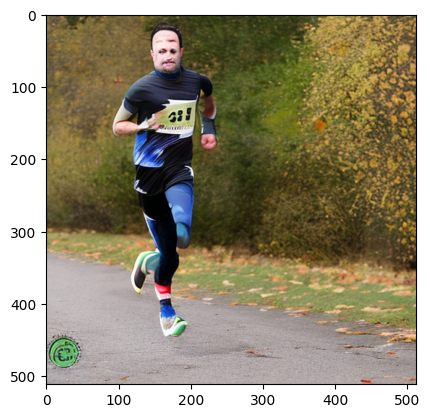

In [1]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt


pipeline = StableDiffusionPipeline.from_pretrained("./weights/", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")
t = pipeline("Man running").images[0]
plt.imshow(t)